In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('../')
from package_global_functions import *
from time_study_maps import search_time

In [2]:
files = glob.glob('falpha_LX1024LY1024_Q3_for_tss/*')

In [8]:
files_dic = {'file':[], 'l':[], 'q1':[], 'q2':[]}
for fle in files:
    l = float(fle.split('_')[8])
    q1 = float(fle.split('_')[22])
    q2 = float(fle.split('_')[24][:-4])
    files_dic['file'].append(fle)
    files_dic['l'].append(l), files_dic['q1'].append(q1), files_dic['q2'].append(q2)

files_df = pd.DataFrame(files_dic)
files_df = files_df.sort_values(by=['l', 'q1'], ignore_index=True)

In [11]:
df = pd.read_csv(files_df.iloc[0]['file'], sep='\s+', names=['iter', 'f0', 'f1', 'f2'])

In [21]:
lattice_times = {'l':[], 'q1':[], 'q2':[], 'time':[], 'Q':[]}
# for fle in files_df.file:
for i in range(len(files_df)):
    fle = files_df.iloc[i]['file']
    q1, q2, l = files_df.iloc[i]['q1'], files_df.iloc[i]['q2'], files_df.iloc[i]['l']
    df = pd.read_csv(fle, sep='\s+', names=['iter', 'f0', 'f1', 'f2'])
    times = []
    for k in range(3):
        time = search_time(50, 5e-4, df[f'f{k}'])
        times.append(time)
    maxTime = max(times)
    df['Q'] = df['f2']-2*df['f1']
    Qval = np.average(df['Q'].iloc[maxTime:])
    lattice_times['l'].append(l), lattice_times['q1'].append(q1), lattice_times['q2'].append(q2)
    lattice_times['time'].append(maxTime), lattice_times['Q'].append(Qval)

In [22]:
lattice_times = pd.DataFrame(lattice_times)

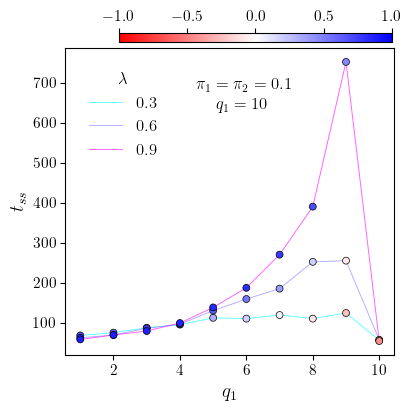

In [33]:
latexFont(ticklabelssize=11,labelsize=14, size=12)
ls = [0.3, 0.6, 0.9]
colors = plt.cm.cool(np.linspace(0,1,len(ls)))
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'$q_1$', ylabel=r'$t_{ss}$', )

for l,c in zip(ls,colors):
    dfaux = lattice_times.query('l == @l')
    ax.plot(dfaux['q1'], dfaux['time'], lw=0.7, marker=None, color=c, alpha=0.6, label=f'{l}', zorder=-1)
    points = ax.scatter(dfaux['q1'], dfaux['time'], c=dfaux['Q'], cmap='bwr_r', vmin=-1, vmax=1, marker='.', s=100, linewidths=0.5, edgecolors='k')

cb = fig.colorbar(points, location='top', aspect=30, fraction=0.05, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
fig.legend(title='$\lambda$', fontsize=12, loc=(0.2, 0.6), frameon=False)
fig.text(0.475, 0.79, '$\pi_1 = \pi_2 = 0.1$')
fig.text(0.525, 0.74, '$q_1 = 10$')

fig.savefig('lattice_times_pi1_0.1_pi2_0.1_q2_10.0_w_50_t_5e-4_sig_0.pdf')